In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.0 MB/s eta 0:0

In [2]:
from pycaret.regression import *

In [3]:
import pandas as pd
data =pd.read_csv("/content/Salary_dataset.csv")
data.head()
data.describe

<bound method NDFrame.describe of     Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0


In [4]:
regressor1 = setup(data=data, target='Salary')

,Description,Value
0,Session id,590
1,Target,Salary
2,Target type,Regression
3,Original data shape,"(30, 3)"
4,Transformed data shape,"(30, 3)"
5,Transformed train set shape,"(21, 3)"
6,Transformed test set shape,"(9, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,7629.1530,78385490.2000,8128.7371,0.0399,0.1225,0.1121,0.0300
rf,Random Forest Regressor,6647.9887,58097794.7502,7182.8353,-1.1826,0.1063,0.0957,0.1270
gbr,Gradient Boosting Regressor,6858.6779,66679941.2291,7731.9585,-1.2411,0.1103,0.0982,0.0770
ada,AdaBoost Regressor,6360.0894,56577489.8142,6917.0639,-1.3322,0.1060,0.0937,0.1030
et,Extra Trees Regressor,6797.9363,54848354.2554,7280.9276,-1.4646,0.1117,0.1036,0.1150
lr,Linear Regression,5986.9641,52193069.9000,6839.2252,-1.5699,0.1040,0.0909,0.5820
lar,Least Angle Regression,5986.9677,52193110.7000,6839.2303,-1.5699,0.1040,0.0909,0.0190
llar,Lasso Least Angle Regression,5987.4555,52190633.6000,6839.5744,-1.5709,0.1041,0.0910,0.0220
lasso,Lasso Regression,5987.4605,52190635.9000,6839.5763,-1.5709,0.1041,0.0910,0.0170
dt,Decision Tree Regressor,7025.4000,71933514.9667,8009.9170,-1.5970,0.1162,0.1010,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [6]:
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2474.7148,15457444.0000,3931.5957,0.9530,0.0651,0.0421
1,8100.3418,65632792.0000,8101.4067,0.1116,0.1617,0.1730
2,9810.7285,96484256.0000,9822.6396,-0.1104,0.1448,0.1343
3,3584.6484,13070443.0000,3615.3069,0.9427,0.0695,0.0711
4,10306.8281,125109728.0000,11185.2461,0.3586,0.1246,0.1024
5,4595.7070,35318260.0000,5942.9170,0.9456,0.0845,0.0669
6,4742.3965,39908184.0000,6317.2925,-21.2255,0.1519,0.1030
7,4835.2422,28537504.0000,5342.0508,0.9523,0.0565,0.0563
8,5259.9062,35309504.0000,5942.1802,0.4781,0.1057,0.1036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
tuned_lr = tune_model(lr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2474.7148,15457444.0000,3931.5957,0.9530,0.0651,0.0421
1,8100.3418,65632792.0000,8101.4067,0.1116,0.1617,0.1730
2,9810.7285,96484256.0000,9822.6396,-0.1104,0.1448,0.1343
3,3584.6484,13070443.0000,3615.3069,0.9427,0.0695,0.0711
4,10306.8281,125109728.0000,11185.2461,0.3586,0.1246,0.1024
5,4595.7070,35318260.0000,5942.9170,0.9456,0.0845,0.0669
6,4742.3965,39908184.0000,6317.2925,-21.2255,0.1519,0.1030
7,4835.2422,28537504.0000,5342.0508,0.9523,0.0565,0.0563
8,5259.9062,35309504.0000,5942.1802,0.4781,0.1057,0.1036


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


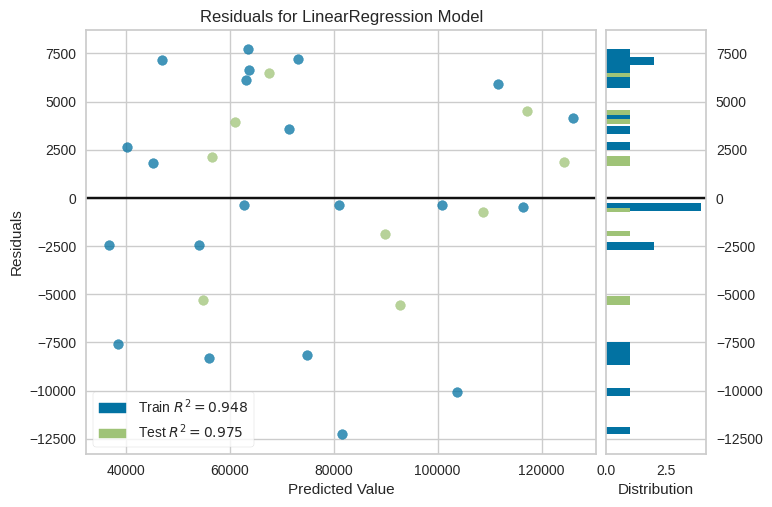

In [8]:
plot_model(tuned_lr, plot='residuals')

In [9]:
knn_model = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4620.7329,28124274.0000,5303.2324,0.9145,0.0743,0.0640
1,7362.4004,60237864.0000,7761.3057,0.1846,0.1662,0.1660
2,9881.1992,97642120.0000,9881.4023,-0.1237,0.1482,0.1362
3,4177.9004,27773716.0000,5270.0776,0.8782,0.1269,0.1050
4,16031.1992,261141376.0000,16159.8691,-0.3388,0.1609,0.1486
5,10160.1992,103472496.0000,10172.1436,0.8405,0.1221,0.1220
6,2745.3984,9332812.0000,3054.9651,-4.1976,0.0669,0.0621
7,7139.8008,60853952.0000,7800.8945,0.8984,0.1441,0.1097
8,5794.8008,33694636.0000,5804.7080,0.5020,0.1178,0.1243


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
tuned_knn = tune_model(knn_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2511.3381,8340115.3647,2887.9258,0.9746,0.0462,0.0376
1,8697.0335,76558840.5122,8749.7909,-0.0363,0.1777,0.1888
2,9272.9138,87430693.1202,9350.4381,-0.0062,0.1447,0.1298
3,5630.2116,43891457.0194,6625.0628,0.8076,0.1547,0.1366
4,17501.3047,354924880.8381,18839.4501,-0.8197,0.1794,0.1564
5,12696.2680,169454549.4514,13017.4709,0.7388,0.1408,0.1409
6,2293.5244,5376157.9400,2318.6543,-1.9941,0.0516,0.0514
7,5047.0469,42943999.9598,6553.1672,0.9283,0.1259,0.0856
8,6836.9743,47582150.3028,6897.9816,0.2967,0.1458,0.1516


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


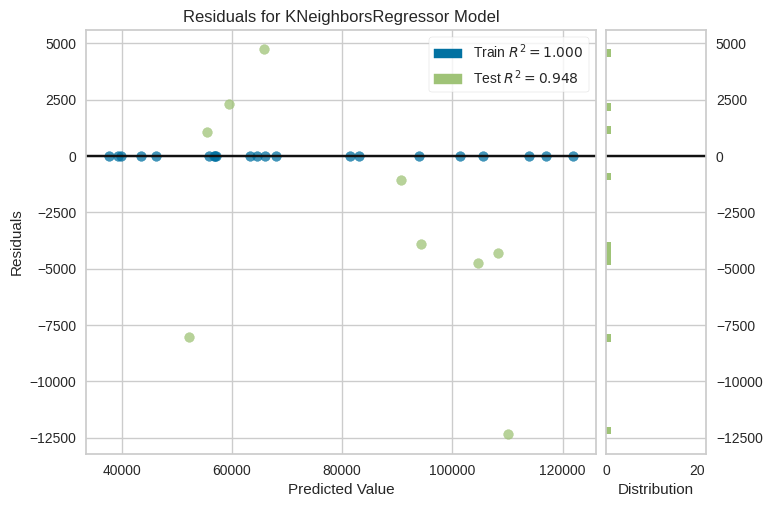

In [11]:
plot_model(tuned_knn, plot='residuals')


In [12]:
final_lr = finalize_model(tuned_lr)
save_model(final_lr, 'final_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'YearsExperience'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 'final_lr_model.pkl')

In [13]:
final_knn = finalize_model(tuned_knn)
save_model(final_knn, 'final_knn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'YearsExperience'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  KNeighborsRegressor(n_jobs=-1, n_neighbors=10,
                                      weights='distance'))]),
 'final_knn_model.pkl')